# Table of contents for the Scripts

1. Importing libraries and data
2. Data cleaning
3. Exploring relationships
4. Correlations

    4.1. Scatterplots

    4.2. Pair plots

    4.3. Categorical plots

# 1. Importing libraries and data

In [7]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [8]:
matplotlib.__version__

'3.8.4'

In [9]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Define path

path = r'C:\Users\Tim\Desktop\Data Analytics Intro\6. Advanced Analytics & Dashboard Design\Global Superstore_Data Analysis Project'

In [11]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\6. Advanced Analytics & Dashboard Design\\Global Superstore_Data Analysis Project'

In [12]:
# importing data

super_store = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'superstore_clean.csv'))

In [13]:
path

'C:\\Users\\Tim\\Desktop\\Data Analytics Intro\\6. Advanced Analytics & Dashboard Design\\Global Superstore_Data Analysis Project'

# 2. Data cleaning

In [14]:
super_store.shape

(51290, 26)

In [15]:
super_store.columns

Index(['Unnamed: 0', 'Category', 'City', 'Country', 'Customer.ID', 'Discount',
       'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID',
       'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales',
       'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

The Unnamed: 0' column must be dropped as it is duplicating the first column meant to identify rows.

In [16]:
# drop the 'Unnamed: 0' column
super_store = super_store.drop('Unnamed: 0', axis =1)

In [50]:
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Discount        51290 non-null  float64
 5   Market          51290 non-null  object 
 6   Order.Date      51290 non-null  object 
 7   Order.ID        51290 non-null  object 
 8   Order.Priority  51290 non-null  object 
 9   Product.ID      51290 non-null  object 
 10  Product.Name    51290 non-null  object 
 11  Profit          51290 non-null  float64
 12  Quantity        51290 non-null  int64  
 13  Region          51290 non-null  object 
 14  Row.ID          51290 non-null  int64  
 15  Sales           51290 non-null  int64  
 16  Segment         51290 non-null  object 
 17  Ship.Date       51290 non-null 

In [17]:
super_store.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Discount          float64
Market             object
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

'Row.ID', 'Year', and 'weeknum' must be string variables and addressed accordingly.

In [18]:
# the Row_ID turned into a string variable.
super_store['Row.ID'] = super_store['Row.ID'].astype('str')
super_store['Year'] = super_store['Year'].astype('str')
super_store['weeknum'] = super_store['weeknum'].astype('str')

In [19]:
#checking for duplicates
df_dups = super_store[super_store.duplicated()]

In [20]:
df_dups

,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,Product.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum


In [21]:
super_store.head()

,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,Product.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [22]:
super_store.describe()

,Discount,Profit,Quantity,Sales,Shipping.Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440,26.375818
std,0.212280,174.340972,2.278766,487.567175,57.296810
min,0.000000,-6599.978000,1.000000,0.000000,0.002000
25%,0.000000,0.000000,2.000000,31.000000,2.610000
50%,0.000000,9.240000,3.000000,85.000000,7.790000
75%,0.200000,36.810000,5.000000,251.000000,24.450000
max,0.850000,8399.976000,14.000000,22638.000000,933.570000


In [23]:
# Check for missing values
super_store.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

# Task 3. Exploring Relationships

# Create a correlation matrix heatmap (colored).

In [24]:
# Creating a subset Sales, Profit, Shipping.Cost, Discount, and Quantity

sub = super_store[['Sales', 'Profit', 'Shipping.Cost', 'Discount','Quantity']]

In [25]:
sub.corr()

,Sales,Profit,Shipping.Cost,Discount,Quantity
Sales,1.000000,0.484923,0.768075,-0.086728,0.313580
Profit,0.484923,1.000000,0.354441,-0.316490,0.104365
Shipping.Cost,0.768075,0.354441,1.000000,-0.079055,0.272649
Discount,-0.086728,-0.316490,-0.079055,1.000000,-0.019875
Quantity,0.313580,0.104365,0.272649,-0.019875,1.000000


In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
super_store_numerical = super_store.select_dtypes(include=numerics)

<Axes: >

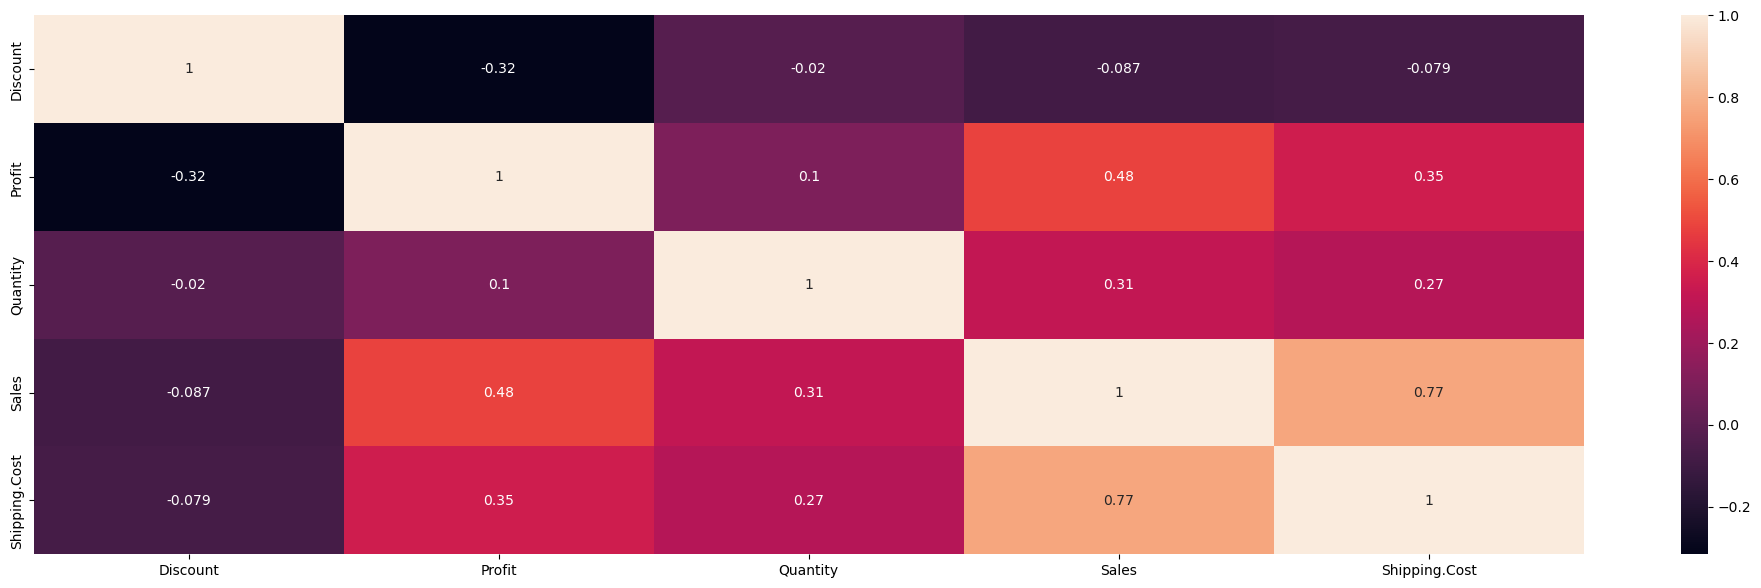

In [27]:
# correlation
plt.figure(figsize=(25, 7))
corr = super_store_numerical.corr()
sns.heatmap(corr, annot=True)

Coefficients in the plot represent the measures of the correlations between the variables. 

Shipping costs exhibit positive correlations with sales, although, where an increase in shipping cost leads to a relative decrease in profit.
    
Also, there is statistical correlations between sales, quantity, and profit. An indication of the presence of correlations among sales figures, the quantity of products sold, and the profit reported by the superstore.
    
Discounts: The discounts exhibit inverse correlations with the sales and profit of the superstore, seen among other variables. 

 

# Task 4. Create a scatterplot (or plots) 

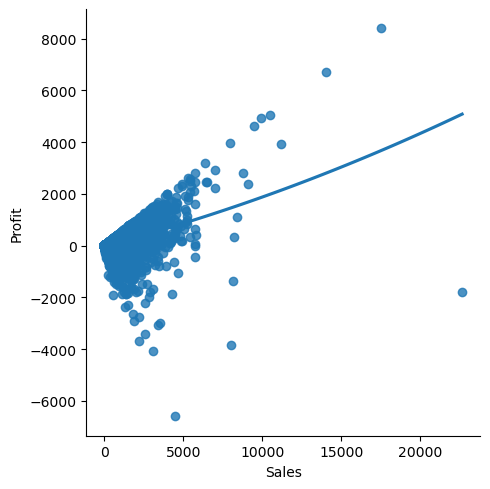

<Figure size 640x480 with 0 Axes>

In [28]:
sns.lmplot(data=super_store, x="Sales", y="Profit", order=2, ci=None)
plt.show()
plt.clf()

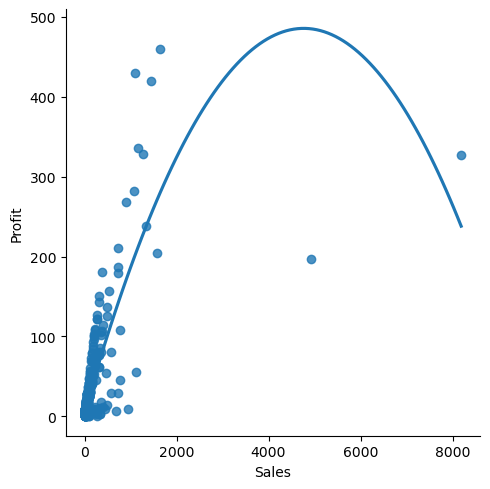

<Figure size 640x480 with 0 Axes>

In [29]:
super_store500 = super_store[:][:500]
sns.lmplot(data=super_store500, x="Sales", y="Profit", order=2, ci=None)
plt.show()
plt.clf()

It is evident that the profit is more concentrated in sales of 7000 and below. Limited outliers are documented at the sales level above 9000, but far more at over 20000. Furthermore, within the sales range of zero to 5000, a profit of 0.02 percent was documented, in contrast to the level reached when sales exceeded 5000. Moreover, discounts also serve as reflecting this narrative.  

# Task 5. Create a pair plot of the entire data set

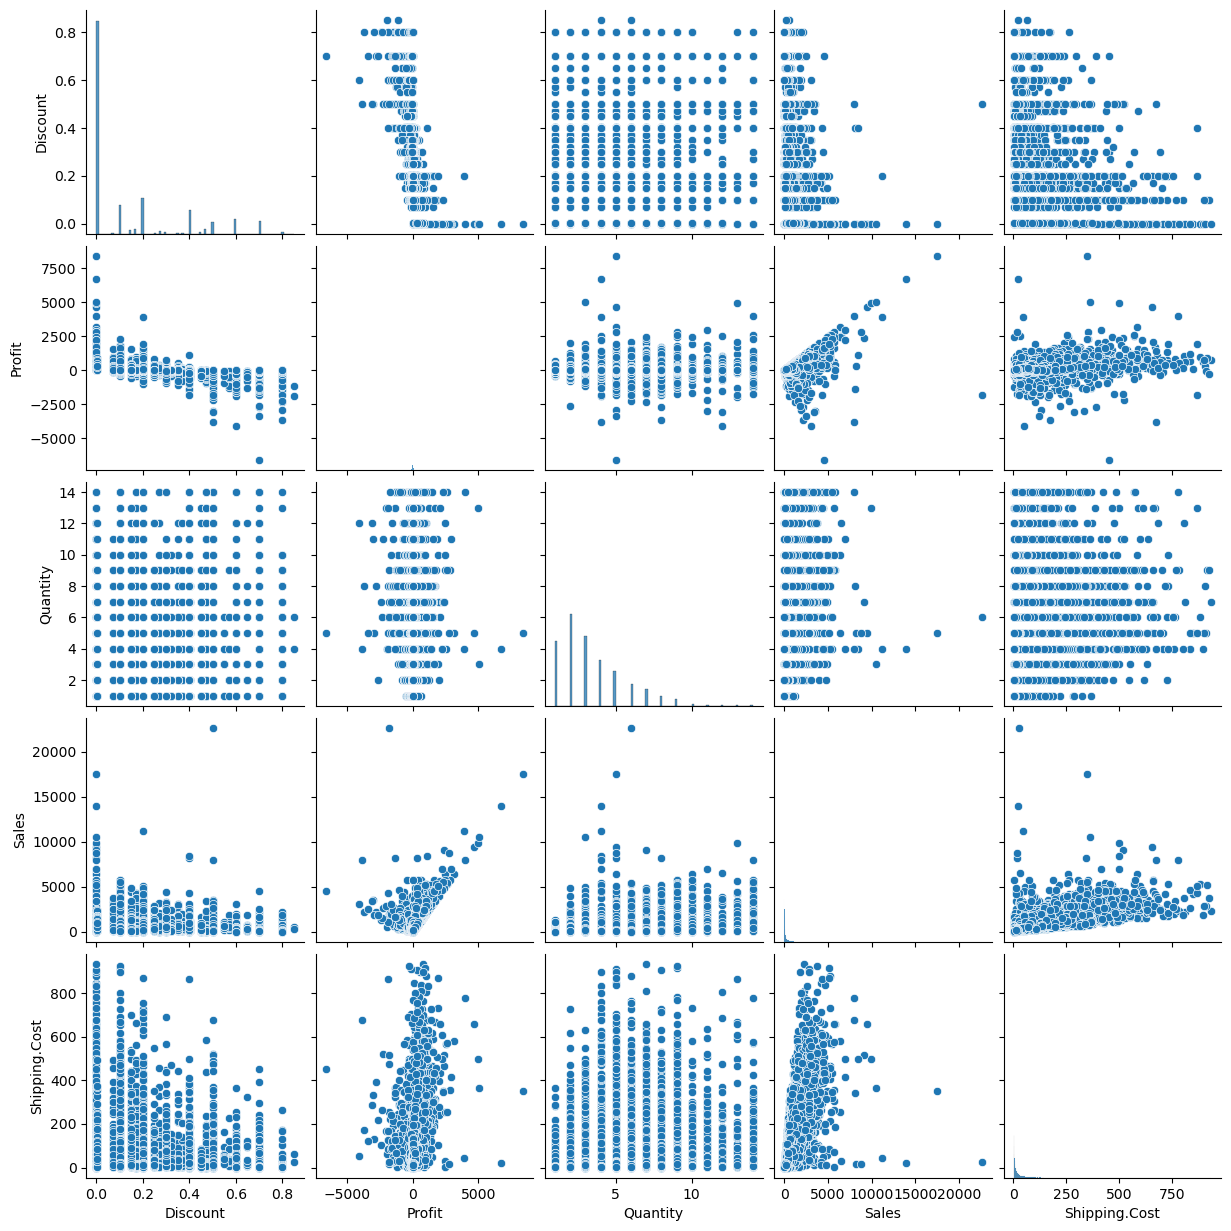

<Figure size 640x480 with 0 Axes>

In [30]:
sns.pairplot(super_store.select_dtypes(exclude=[object]))
plt.show()
plt.clf()

A pair plot typically displays the correlations between variables. For instance, it was observed that the majority of the sales recorded were concentrated at a value of 5000 and below. Although the profit is determined by the marginal variance of the sales, the shipping cost mostly impacts products and sales figures below 5000, which is the majority of recorded sales. Quantity does not exhibit a significant correlation with the reported profit margin. 

# Task 6. Create a categorical plot and interpret the results.

<Axes: xlabel='Profit', ylabel='Count'>

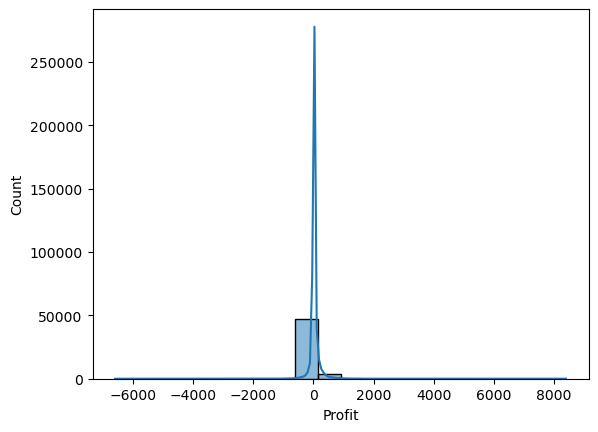

In [31]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(super_store['Profit'], bins = 20, kde = True)

<Axes: xlabel='Sales', ylabel='Count'>

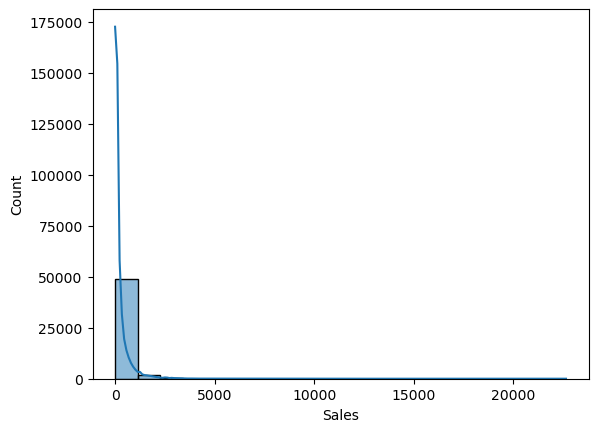

In [32]:
sns.histplot(super_store['Sales'], bins = 20, kde = True)

The same scenario was also noticed the the categorical plot. 

<Axes: xlabel='Quantity', ylabel='Count'>

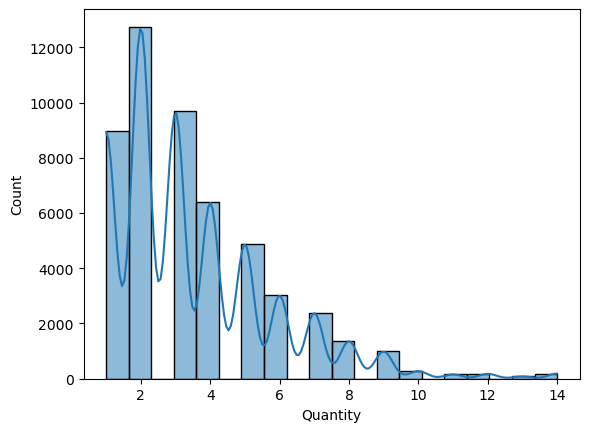

In [33]:
sns.histplot(super_store['Quantity'], bins = 20, kde = True)

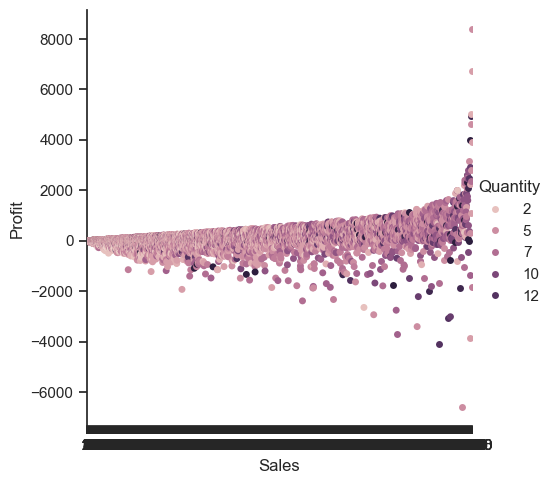

In [34]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
super_store = sns.catplot(x="Sales", y="Profit", hue="Quantity", data=super_store)

An analysis revealed that most of the sales and profit figures were within the range of 5000 sales level and below. While the marginal variance of sales typically determines the profit, the shipping cost mostly affects products and sales figures below 5000, which constitutes the bulk of recorded sales and the profit. There is no substantial correlation between quantity and the observed profit margin.

# Task 7. Revisit questions generated in the previous task 

•	Sales and profit analysis

•	What are the top-performing product categories in terms of sales and profit?

•	How does the profit vary by product category or sub-category?

•	Which cities or countries have the highest average sales and profit?

•	How do discounts impact customers' orders?

•	How does order priority affect the shipping costs and delivery times?

•	How do sales and profits vary across different regions and markets?

•	Are there seasonal trends in sales and profit across different years?

•	What is the relationship between order quantity and shipping cost?

•	How does shipping cost affect the overall profitability of an order?

•	Which products have the highest profits?

# Task 8. Define any hypotheses that you can at this point. You’ll be testing these later on

A positive correlation exists between sales volume and profit, whereby an increase in sales will result in a proportional increase in profit, provided that other costs, such as shipping cost remain constant and variable costs grow moderately at a faster pace of sales.

In this case, the validity of this hypothesis can be assessed by examining sales and profit data, while accounting for shipping costs and other sources of influence like quantity, to ascertain the existence of the relationship.
